# Baseball Case Study

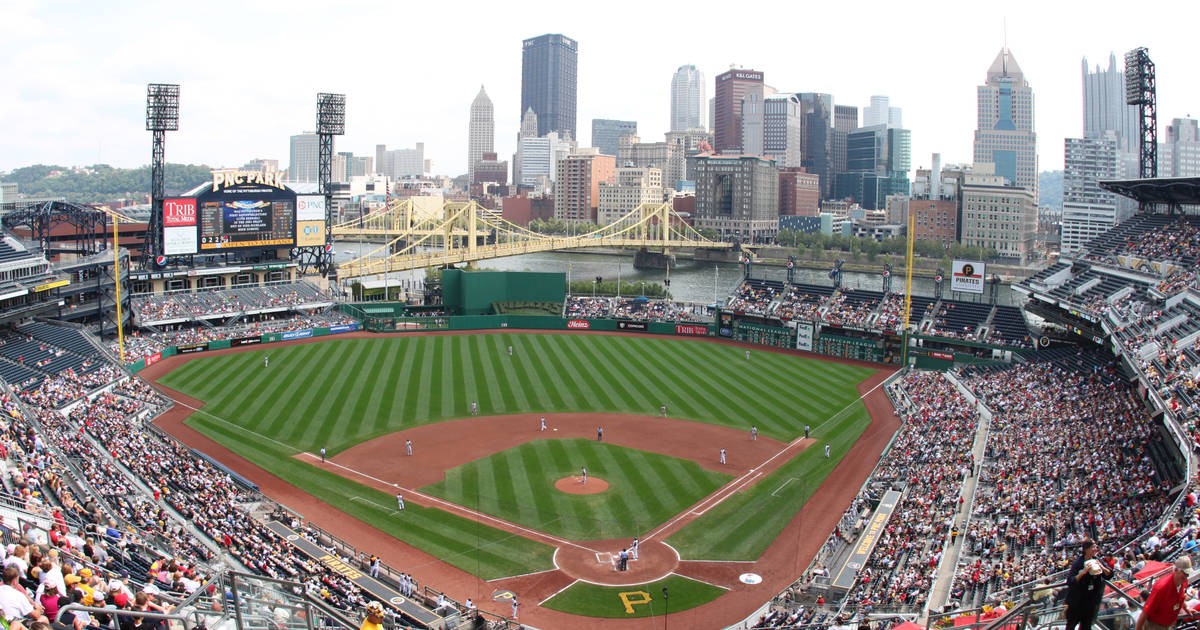

<b>Problem Statement:</b>

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

<b>Input features:</b>       

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

<b>Output:</b> Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('baseball.csv')
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

# Now, let's analyze the dataset

<b>W – Win:</b> number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

<b>R – Runs scored:</b> number of times a player crosses home plate

<b>AB – At bat:</b> plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

<b>H – Hit:</b> reaching base because of a batted, fair ball without error by the defense

<b>2B – Double:</b> hits on which the batter reaches second base safely without the contribution of a fielding error

<b>3B – Triple:</b> hits on which the batter reaches third base safely without the contribution of a fielding error

<b>HR – Home runs:</b> hits on which the batter successfully touched all four bases, without the contribution of a fielding error

<b>BB – Base on balls (also called a "walk"):</b> hitter not swinging at four pitches called out of the strike zone and awarded first base.

<b>SO – Strikeout:</b> number of batters who received strike three

<b>SB – Stolen base:</b> number of bases advanced by the runner while the ball is in the possession of the defense

<b>RA – Run average:</b> number of runs allowed times nine divided by innings pitched

<b>ER – Earned run:</b> number of runs that did not occur as a result of errors or passed balls

<b>ERA – Earned run average:</b> total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

<b>CG – Complete game:</b> number of games where player was the only pitcher for their team

<b>SHO – Shutout:</b> number of complete games pitched with no runs allowed

<b>SV – Save:</b> number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

<b>E – Errors:</b> number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

<b> Here, the column 'W' is the target variable and the remaining columns are the features.</b>

<b> Note that the dataset contains only numerical data, and no categorical data.          
By observing the dataset and problem statement, we can conclude that, this is a Regression problem.</b>

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [5]:
df.tail()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

In [6]:
df.sample(3)

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
10  88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
2   81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
19  64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   

    SHO  SV    E  
10    9  45  119  
2    10  38   79  
19    8  35   90

In [7]:
df.shape

(30, 17)

<b> The dataset consists of 30 rows and 17 columns.</b>

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<b> The dataset consists of 17 columns, i.e., 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV' and 'E'.</b>         

<b> Here, the column 'W' is the target variable and the remaining columns are the features.</b>    

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

<b> Note that, all the columns are of integer datatype, except one column 'ERA' which is of float datatype.         
This means that all the columns are numeric in nature, hence there's no need of applying encoding techniques.</b>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<b> As we can see, there are no null values in the dataset. Also, all the columns are numeric in nature.</b>

In [11]:
# Let's check the number of unique values present in the dataset

df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [12]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<b> We can see that, there are no null values in the dataset.</b>

<AxesSubplot:>

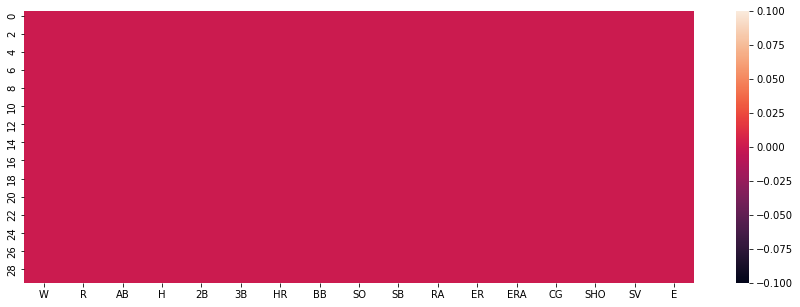

In [13]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b> We can confirm that there are no null values in the dataset by looking at the Heat Map.</b>

In [14]:
# Now, let's check the uniqueness of the target variable, i.e., 'W'

df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [15]:
# Now, let's check the value count of the target variable, i.e., 'W'

df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [16]:
# Now, let's check whether the dataset contains any space

df.loc[df['W']==" "]

Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []

<b> As we can see, there is no space in the dataset.</b>

# Statistical Description of the Dataset

In [17]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

<b> This provides the statistical description of the data set. As there are no negative / invalid values present in the dataset, we can say that the dataset appears perfect.</b>

<b> By looking at the description of the data, we can conclude the following things:</b>

* As the count of all the columns is the same, we can conclude that are no null values in the dataset.     
* We can see that, in the target column, the mean is a little less than the median(50%). The mean is 80.96 and the median is 81.00. Thus, we can conclude that the data is skewed to the left.
* We can see that, in the target column, the mean is less than the maximum. The mean is 80.96 and maximum is 100. Thus, we can conclude that the team won more matches.
* The columns 'R', '2B', 'BB', 'SO', 'RA', 'ER', 'ERA' and 'SHO' have mean less than the median. Thus, we can conclude that these columns are skewed to the left.
* The columns 'AB', 'H', 'HR', 'SV' and 'E' have mean greater than the median. Thus, we can conclude that these columns are skewed to the right.
* In case of column 'CG', the mean is just a little more than the median. The mean is 3.46 and the median is 3. Thus, we can conclude that the data is almost normal distributed for this column.
* In case of the columns '3B' and 'SB', the mean is equal to the median. Thus, we can conclude that the data is normal or symmetrical.
* We can see that there is a huge differences in max and 75% percentile(3rd quantile).
* From all these observations, we can conclude that outliers are present in many of these columns. 

<AxesSubplot:>

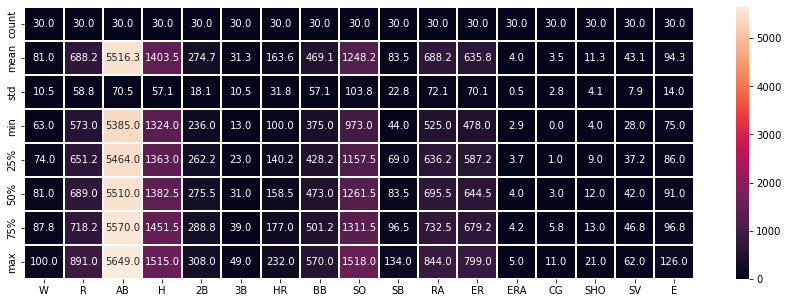

In [18]:
# Now, let's visualize the statistics of the columns using Heatmap

plt.figure(figsize=(15,5))

sns.heatmap(df.describe(), linewidths=0.1, fmt='0.1f', annot=True)

# Data Visualization

# Univariate Analysis

<AxesSubplot:xlabel='W', ylabel='Count'>

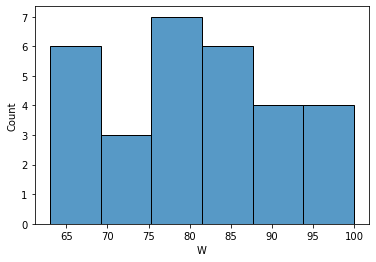

In [19]:
sns.histplot(df['W'])

<b>From the histogram plot above, we can see that the target column has normalized data and there is no skewness present. The minimum team win rate is 63 and the maximum is 100. The team's average win rate is 80. The team win rate is more between 75 to 80 and is low in the range of 70 to 75.</b>

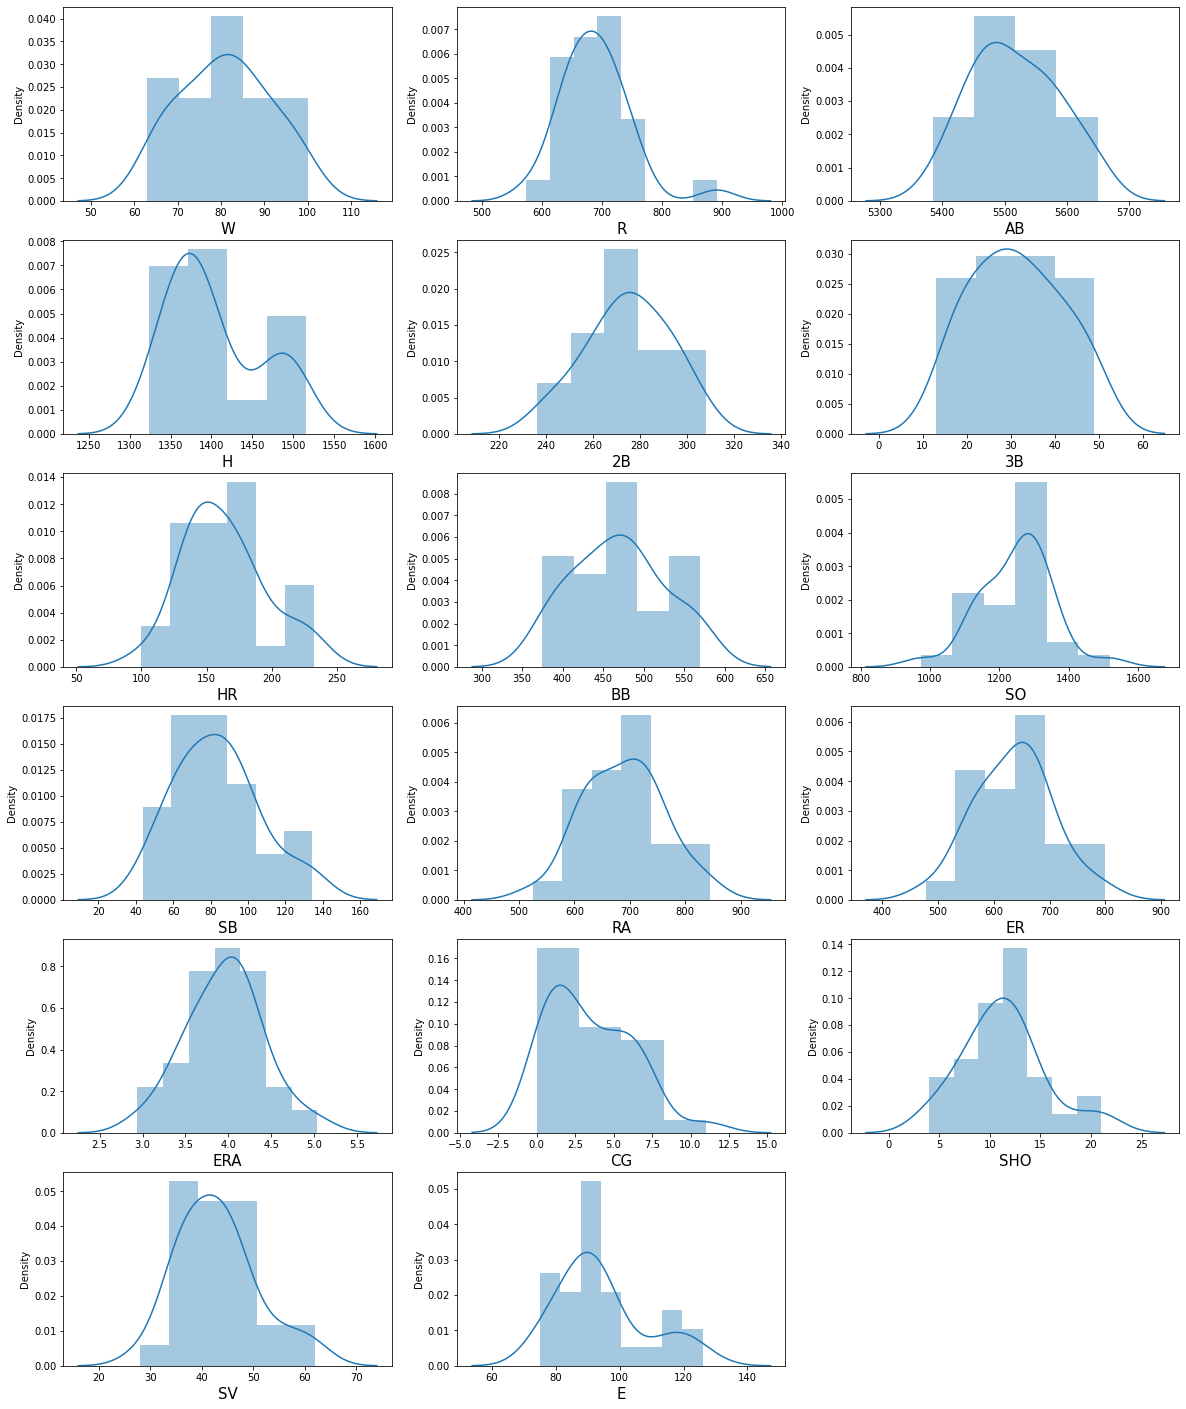

In [20]:
# Now, let's check how the data has been distriubted in each column

plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

<b> From the distribution plot above, we can observe the following things:</b>

* The target column, i.e., 'W' is normally distributed and there is no skewness present.
* The column 'R' is not normal, it is skewed to the left. The run rate lies between 570-890.
* The column 'AB', '3B','SB','CG', and 'ER' are normally distributed and have no skewness.
* The columns 'BB','SO','RA','ERA'and'SHO' appear to be normal, but they have skewness.
* The columns 'H','HR','SV' and 'E' are not normal and they are skewed to the right.
* The column '2B' appears to be normally distributed but a little skewness is present. Its value lies between 230-300.  

# Bivariate Analysis

Text(0, 0.5, 'Wins')

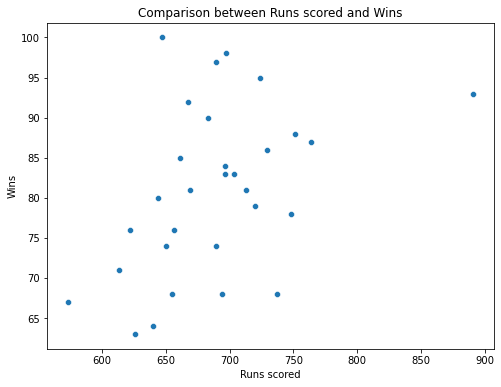

In [21]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Runs scored and Wins')
sns.scatterplot(df['R'],df['W'])
plt.xlabel("Runs scored")
plt.ylabel("Wins")

<b>The scatterplot above shows a weak linear relationship. As "Runs scored" increases, "Wins" also increases. Thus, we can conclude that they are slightly positively correlated.</b>

Text(0, 0.5, 'Wins')

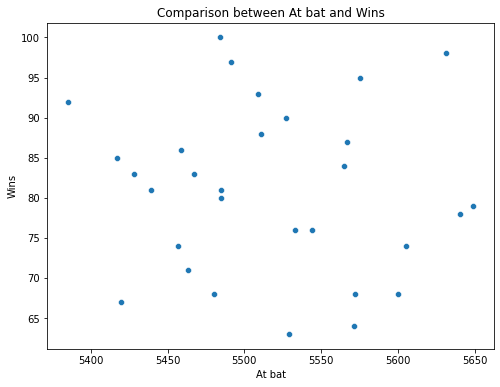

In [22]:
plt.figure(figsize=[8,6])
plt.title('Comparison between At bat and Wins')
sns.scatterplot(df['AB'],df['W'])
plt.xlabel("At bat")
plt.ylabel("Wins")

<b> In the above scatterplot, the data points are scattered. Hence, there is no significant linear relationship between "At bat" and "Wins". Thus, we can conclude that there is no correlation.</b>

Text(0, 0.5, 'Wins')

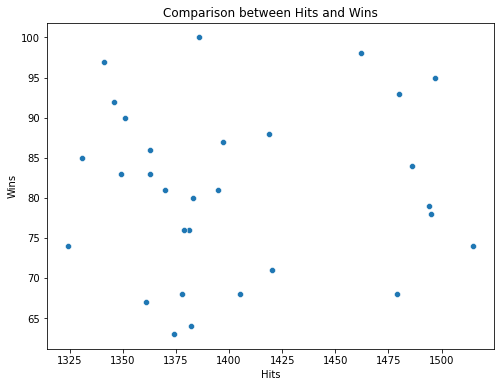

In [23]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Hits and Wins')
sns.scatterplot(df['H'],df['W'])
plt.xlabel("Hits")
plt.ylabel("Wins")

<b> In the above scatterplot, the data points are scattered. Hence, there is no significant linear relationship between "Hits" and "Wins". Thus, we can conclude that there is no correlation.</b>

Text(0, 0.5, 'Wins')

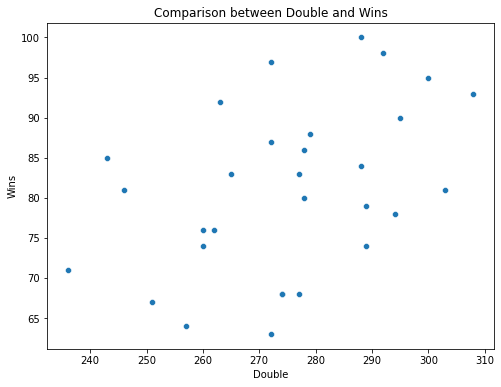

In [24]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Double and Wins')
sns.scatterplot(df['2B'],df['W'])
plt.xlabel("Double")
plt.ylabel("Wins")

<b> The scatterplot above shows a weak linear relationship. As "Double" increases, "Wins" also increases. Thus, we can conclude that they are slightly positively correlated.</b>

Text(0, 0.5, 'Wins')

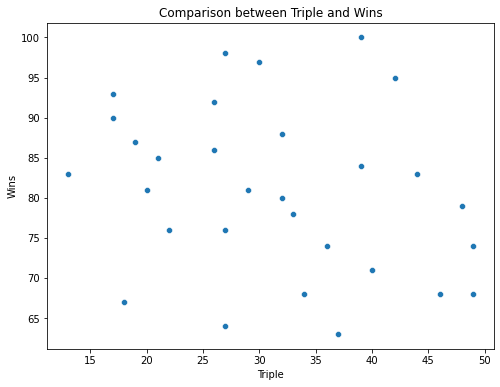

In [25]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Triple and Wins')
sns.scatterplot(df['3B'],df['W'])
plt.xlabel("Triple")
plt.ylabel("Wins")

<b>In the above scatterplot, the data points are scattered. Hence, there is no significant linear relationship between "Triple" and "Wins". Thus, we can conclude that there is no correlation.</b>

Text(0, 0.5, 'Wins')

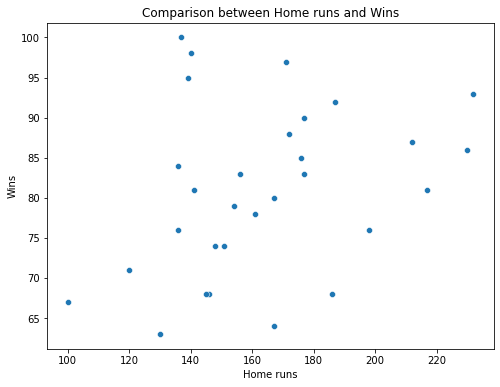

In [26]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Home runs and Wins')
sns.scatterplot(df['HR'],df['W'])
plt.xlabel("Home runs")
plt.ylabel("Wins")

<b> The scatterplot above shows a weak linear relationship. As "Home runs" increases, "Wins" also increases. Thus, we can conclude that they are slightly positively correlated.</b>

Text(0, 0.5, 'Wins')

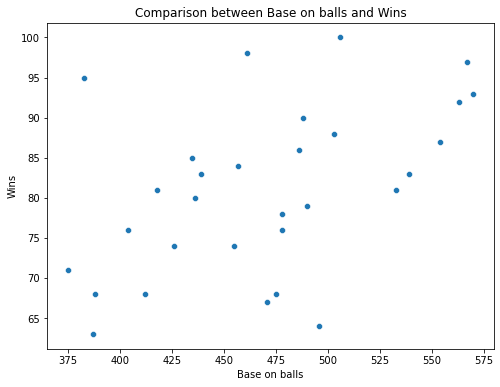

In [27]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Base on balls and Wins')
sns.scatterplot(df['BB'],df['W'])
plt.xlabel("Base on balls")
plt.ylabel("Wins")

<b>The scatterplot above shows a weak linear relationship. As "Base on balls" increases, "Wins" also increases. Thus, we can conclude that they are slightly positively correlated.</b>

Text(0, 0.5, 'Wins')

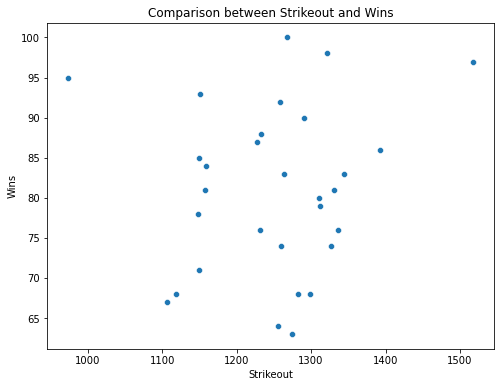

In [28]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Strikeout and Wins')
sns.scatterplot(df['SO'],df['W'])
plt.xlabel("Strikeout")
plt.ylabel("Wins")

<b> The scatterplot above shows a weak linear relationship. As "Strikeout" increases, "Wins" also increases. Thus, we can conclude that they are slightly positively correlated.</b>

Text(0, 0.5, 'Wins')

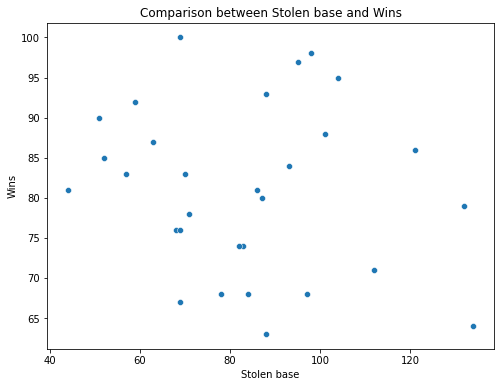

In [29]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Stolen base and Wins')
sns.scatterplot(df['SB'],df['W'])
plt.xlabel("Stolen base")
plt.ylabel("Wins")

<b> In the above scatterplot, the data points are scattered. Hence, there is no significant linear relationship between "Stolen base" and "Wins". Thus, we can conclude that there is no correlation.</b>

Text(0, 0.5, 'Wins')

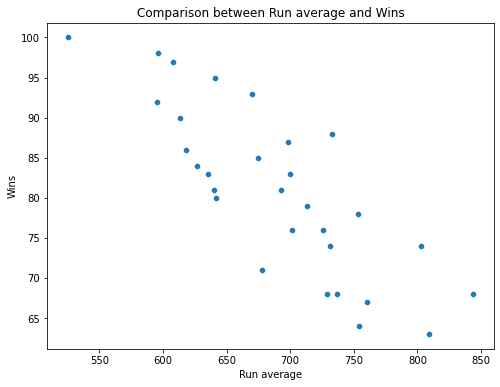

In [30]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Run average and Wins')
sns.scatterplot(df['RA'],df['W'])
plt.xlabel("Run average")
plt.ylabel("Wins")

<b> The scatter plot above shows a negative linear relationship. Since the data falls from left to right, it means that "Wins" is highly correlated with "Run Average". Thus, we can conclude that they are negatively correlated.</b>

Text(0, 0.5, 'Wins')

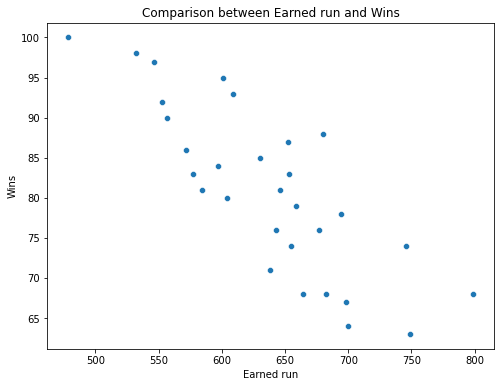

In [31]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Earned run and Wins')
sns.scatterplot(df['ER'],df['W'])
plt.xlabel("Earned run")
plt.ylabel("Wins")

<b> The scatter plot above shows a negative linear relationship. Since the data falls from left to right, it means that "Wins" is highly correlated with "Earned run". Thus, we can conclude that they are negatively correlated.</b>

Text(0, 0.5, 'Wins')

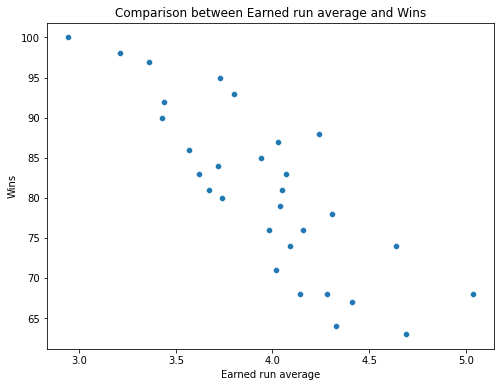

In [32]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Earned run average and Wins')
sns.scatterplot(df['ERA'],df['W'])
plt.xlabel("Earned run average")
plt.ylabel("Wins")

<b> The scatter plot above shows a negative linear relationship. Since the data falls from left to right, it means that "Wins" is highly correlated with "Earned run average". Thus, we can conclude that they are negatively correlated.</b>

Text(0, 0.5, 'Wins')

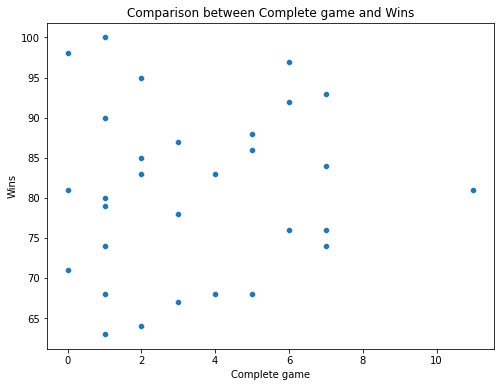

In [33]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Complete game and Wins')
sns.scatterplot(df['CG'],df['W'])
plt.xlabel("Complete game")
plt.ylabel("Wins")

<b> In the above scatterplot, the data points are scattered. Hence, there is no significant linear relationship between "Complete game" and "Wins". Thus, we can conclude that there is no correlation.</b>

Text(0, 0.5, 'Wins')

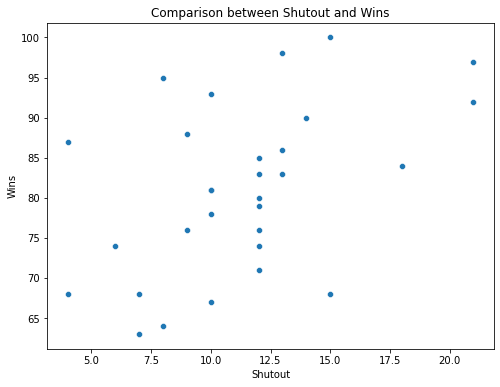

In [34]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Shutout and Wins')
sns.scatterplot(df['SHO'],df['W'])
plt.xlabel("Shutout")
plt.ylabel("Wins")

<b> The scatterplot above shows a weak linear relationship. As "Shutout" increases, "Wins" also increases. Thus we can conclude that they are slightly positively correlated.</b>

Text(0, 0.5, 'Wins')

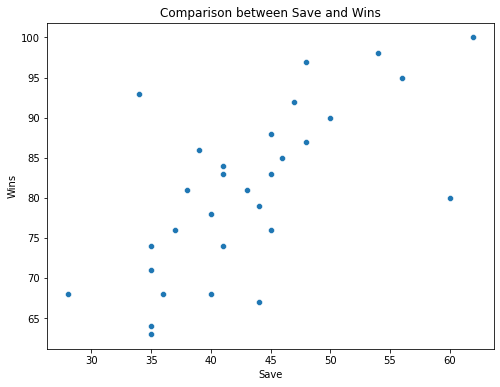

In [35]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Save and Wins')
sns.scatterplot(df['SV'],df['W'])
plt.xlabel("Save")
plt.ylabel("Wins")

<b> The scatterplot above shows a weak linear relationship. As "Save" increases, "Wins" also increases. Thus we can conclude that they are slightly positively correlated.</b>

Text(0, 0.5, 'Wins')

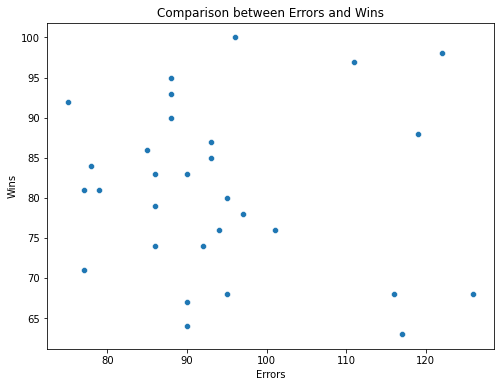

In [36]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Errors and Wins')
sns.scatterplot(df['E'],df['W'])
plt.xlabel("Errors")
plt.ylabel("Wins")

<b> In the above scatterplot, the data points are scattered. Hence, there is no significant linear relationship between "Errors" and "Wins". Thus, we can conclude that there is no correlation.</b>

Text(0, 0.5, 'Errors')

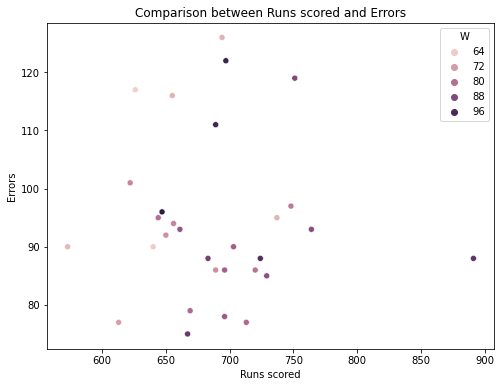

In [37]:
plt.figure(figsize=(8,6))
plt.title("Comparison between Runs scored and Errors")
sns.scatterplot(df['R'],df['E'], hue = df['W'])
plt.xlabel('Runs scored')
plt.ylabel('Errors')

<b> The scatterplot above shows the relationship between "Runs scored" and "Errors" with respect to "Wins". As the data points are scattered, there is no linear relationship between these columns. Thus, we can conclude that there is no correlation.</b>

Text(0, 0.5, 'Hits')

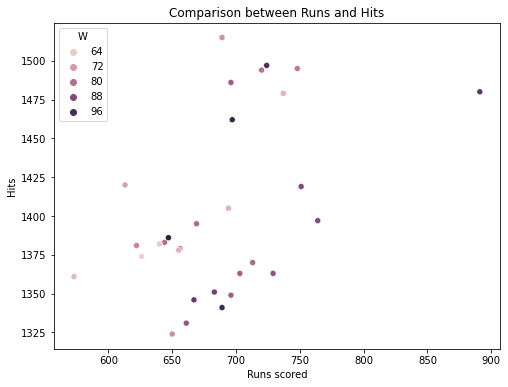

In [38]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Runs and Hits')
sns.scatterplot(df['R'],df['H'],hue=df['W'])
plt.xlabel('Runs scored')
plt.ylabel('Hits')

<b> The scatterplot above shows the relationship between "Runs scored" and "Hits" with respect to "Wins". As the data points are scattered, there is no linear relationship between these columns. Thus, we can conclude that there is no correlation.</b>

Text(0, 0.5, 'Hits')

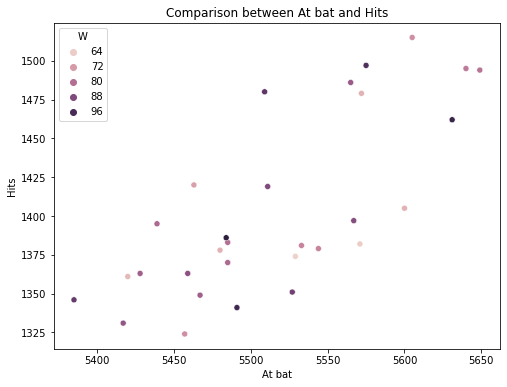

In [39]:
plt.figure(figsize=([8,6]))
plt.title("Comparison between At bat and Hits")
sns.scatterplot(df['AB'], df['H'], hue=df['W'])
plt.xlabel('At bat')
plt.ylabel('Hits')

<b> The scatterplot above shows the relationship between "At bat" and "Hits" with respect to "Wins". It shows a weak linear relationship. As "At bat" increases with "Hits", then "Wins" also increases. Thus we can conclude that they are slightly positively correlated.</b>

Text(0, 0.5, 'Earned run average')

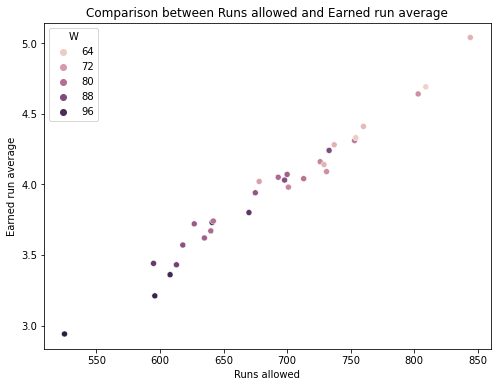

In [40]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Runs allowed and Earned run average')
sns.scatterplot(df['RA'],df['ERA'],hue=df['W'])
plt.xlabel("Runs allowed")
plt.ylabel("Earned run average")

<b> The scatterplot above shows the relationship between "Runs allowed" and "Earned run average" with respect to "Wins". It shows a strong linear relationship. As "Runs allowed" increases with "Earned run average", then "Wins" also increases. Thus we can conclude that they are highly positively correlated.</b>

Text(0, 0.5, 'Earned run average')

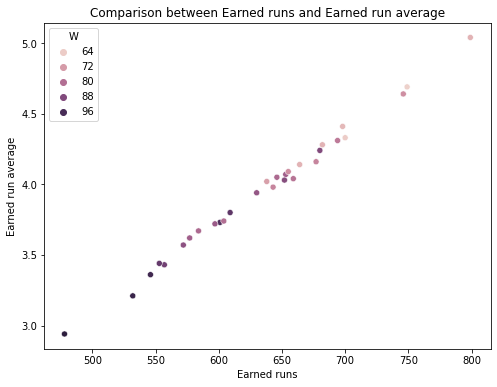

In [41]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Earned runs and Earned run average')
sns.scatterplot(df['ER'],df['ERA'],hue=df["W"]);
plt.xlabel("Earned runs")
plt.ylabel("Earned run average")

<b> The scatterplot above shows the relationship between "Earned runs" and "Earned run average" with respect to "Wins". It shows a strong linear relationship. As "Earned runs" increases with "Earned run average", then "Wins" also increases. Thus we can conclude that they are highly positively correlated.</b>

# Multivariate Analysis

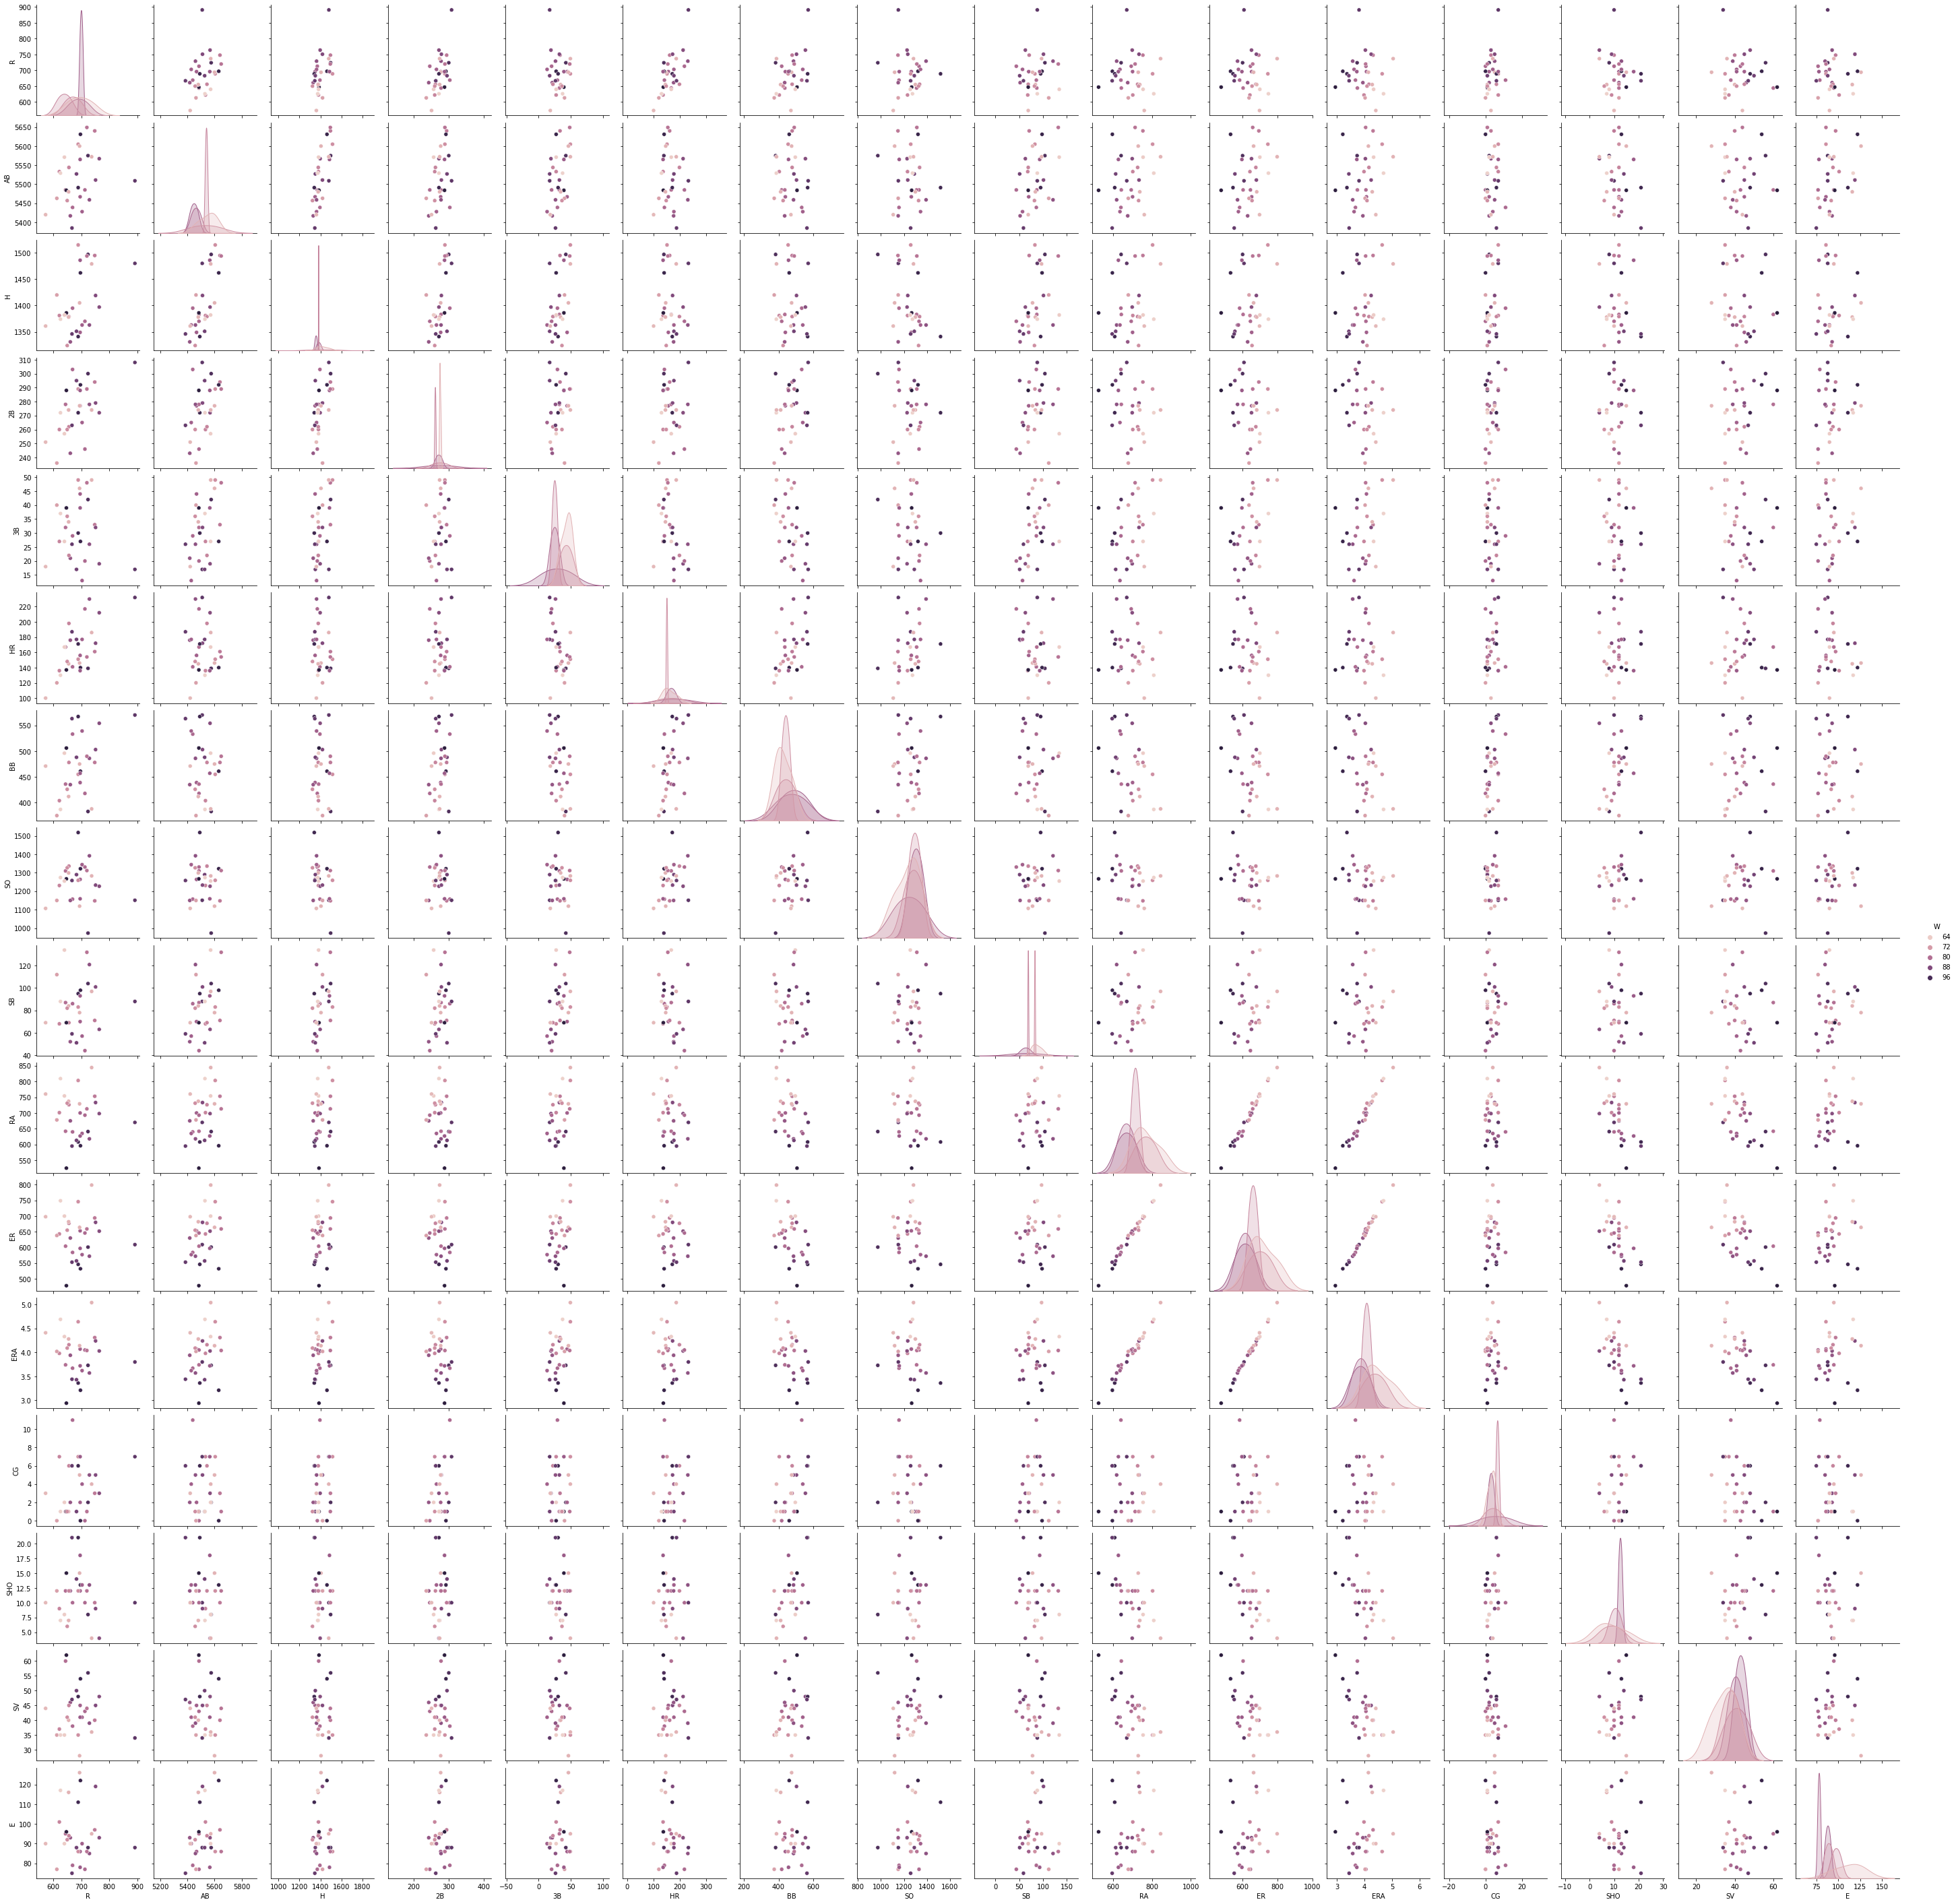

In [42]:
sns.pairplot(df, hue='W')

<b> This pairplot gives the pairwise relationship between the columns which is plotted on the basis of the target variable'W'. We can also observe relationship between all the features and the labels.</b>

# Correlation between features and labels

In [43]:
df.corr()

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   
ERA -0.819600 -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917   
CG   0.080533  0.232042 -0.080876  0.147955  0.306675 -0.065898  0.156502   
SHO  0.471805 -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119   
SV   0.666530 -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540   
E   -0.089485 -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.080533   
R    0.402452 -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.232042   
AB  -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.080876   
H   -0.118281 -0.398830  0.413444  0.224324  0.252489  0.231172  0.147955   
2B   0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.306675   
3B  -0.454949 -0.141196  0.457437  0.314125  0.340225  0.330951 -0.065898   
HR   0.425691  0.359923 -0.136567 -0.103903 -0.085922 -0.090917  0.156502   
BB   1.000000  0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.462478   
SO   0.233652  1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.093418   
SB  -0.098347  0.030968  1.000000  0.132290  0.143068  0.126063 -0.020783   
RA  -0.416445 -0.129745  0.132290  1.000000  0.991018  0.986674 -0.016659   
ER  -0.452663 -0.161612  0.143068  0.991018  1.000000  0.997248 -0.020221   
ERA -0.459832 -0.180368  0.126063  0.986674  0.997248  1.000000 -0.009856   
CG   0.462478 -0.093418 -0.020783 -0.016659 -0.020221 -0.009856  1.000000   
SHO  0.426004  0.237721 -0.106563 -0.636862 -0.630192 -0.630833  0.241676   
SV   0.099445  0.126297 -0.183418 -0.616224 -0.589663 -0.607005 -0.367766   
E   -0.075685  0.155133  0.079149  0.198996  0.136921  0.113137 -0.140047   

          SHO        SV         E  
W    0.471805  0.666530 -0.089485  
R   -0.103274 -0.096380 -0.023262  
AB  -0.197321 -0.106367  0.316743  
H   -0.145559 -0.130371 -0.033173  
2B   0.057998  0.171576  0.105754  
3B  -0.041396 -0.142370  0.126678  
HR  -0.019119 -0.028540 -0.207597  
BB   0.426004  0.099445 -0.075685  
SO   0.237721  0.126297  0.155133  
SB  -0.106563 -0.183418  0.079149  
RA  -0.636862 -0.616224  0.198996  
ER  -0.630192 -0.589663  0.136921  
ERA -0.630833 -0.607005  0.113137  
CG   0.241676 -0.367766 -0.140047  
SHO  1.000000  0.221639 -0.115716  
SV   0.221639  1.000000 -0.025636  
E   -0.115716 -0.025636  1.000000

# Correlation between features and labels using Heatmap

<AxesSubplot:>

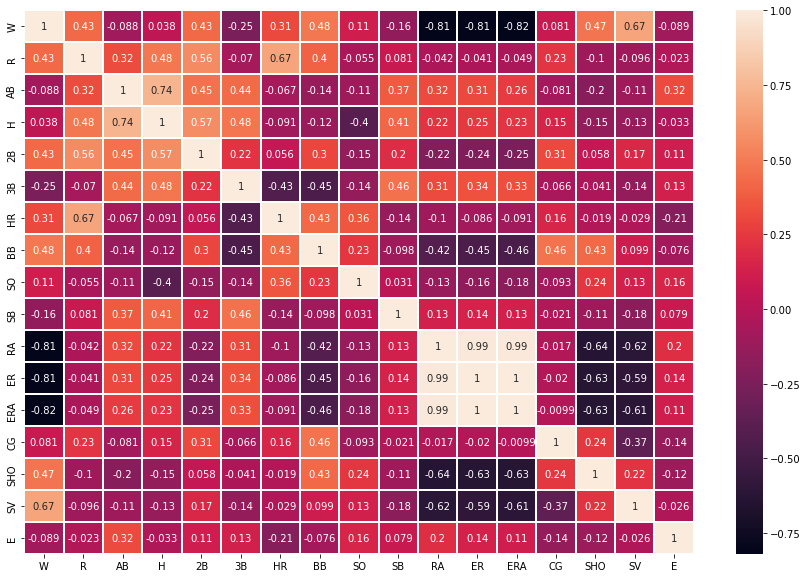

In [44]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), linewidths=0.1, annot = True)

<b> The heatmap contains both positive and negative correlations.</b>

<b> Positively correlated columns:</b>                 
The column 'SV' is 67% correlated with the target column 'W'         
The column 'SHO' is 47% correlated with the target column 'W'        
The column 'CG'  is 8% correlated with the target column 'W'           
The column 'SO'  is 11% correlated with the target column 'W'        
The column 'BB'  is 48% correlated with the target column 'W'          
The column 'HR'  is 31% correlated with the target column 'W'          
The column '2B'  is 43% correlated with the target column 'W'        
The column 'H'  is 3% correlated with the target column 'W'       
The column 'R'  is 43% correlated with the target column 'W'

<b> Negatively correlated columns:</b>         
The columns  'ERA','ER', and 'RA' are highly negatively correlated with the target column 'W'       
The columns 'E','SB','3B' and 'AB' are negatively correlated with the target column 'W'

<b> The columns 'ERA','ER', and 'RA' are highly negatively correlated with each other which can create multicolinearity problem. To avoid the multicollinearity problem, we will check VIF value and drop these columns, if necessary.</b>

<b> As the columns 'H' and 'CG' have very less correlation with the target column 'W', we will drop these columns.</b>

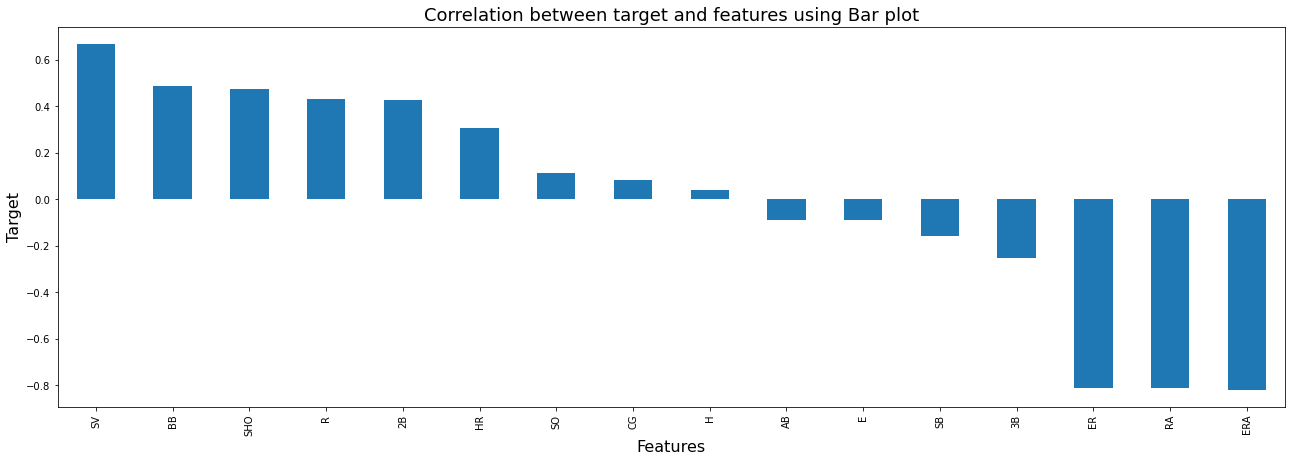

In [45]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation between target and features using Bar plot',fontsize=18)
plt.show()

In [46]:
# Now, let's drop the columns 'H' and 'CG'

df.drop('H', axis=1, inplace=True)
df.drop('CG', axis = 1, inplace=True)
df.head()

W    R    AB   2B  3B   HR   BB    SO   SB   RA   ER   ERA  SHO  SV    E
0  95  724  5575  300  42  139  383   973  104  641  601  3.73    8  56   88
1  83  696  5467  277  44  156  439  1264   70  700  653  4.07   12  45   86
2  81  669  5439  303  29  141  533  1157   86  640  584  3.67   10  38   79
3  76  622  5533  260  27  136  404  1231   68  701  643  3.98    9  37  101
4  74  689  5605  289  49  151  455  1259   83  803  746  4.64   12  35   86

In [47]:
df.shape

(30, 15)

<b> By checking out the shape of the dataset, we can confirm that the columns 'H' and 'CG' have been deleted.</b>

# Outliers Detection

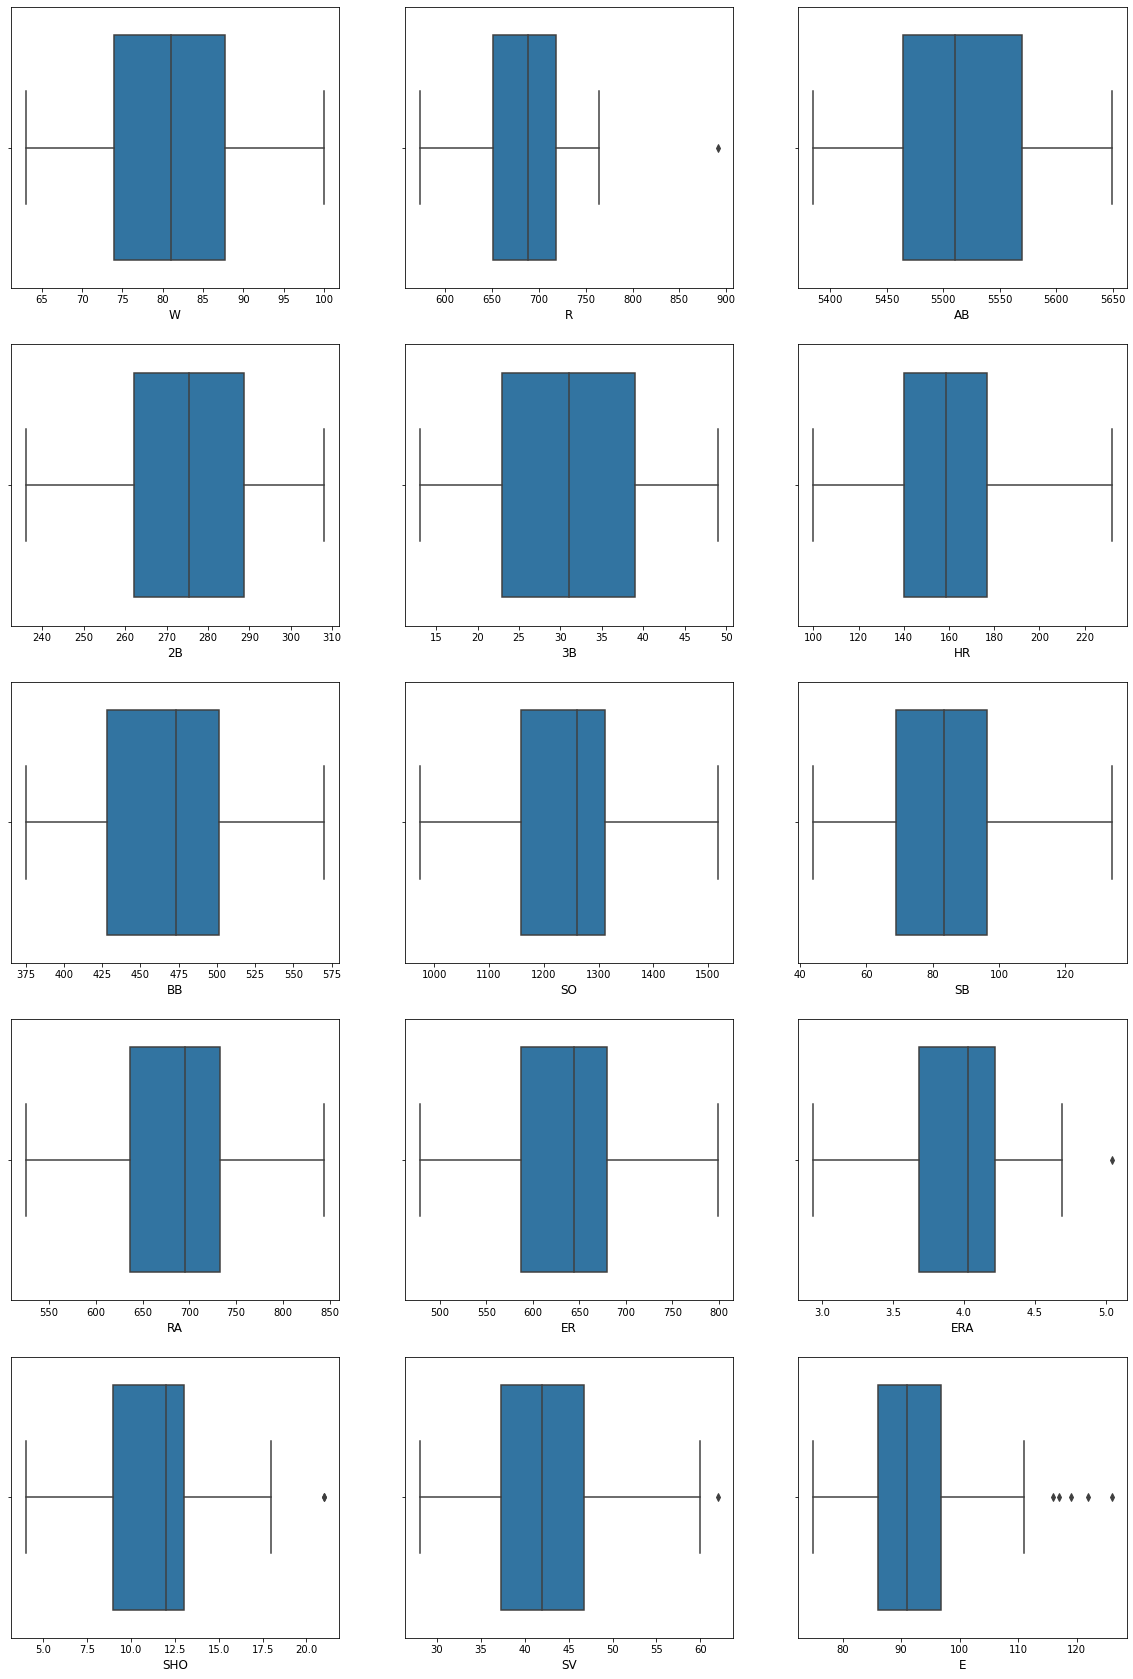

In [48]:
plt.figure(figsize=(20,30))
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 12)
    plotnumber+=1
plt.show()

<b> We can see that outliers are present in the columns 'R', 'ERA', 'SHO', 'SV' and 'E'. So, let's remove them.</b>

In [49]:
features = df[['R','ERA','SHO','SV','E']]

from scipy.stats import zscore

z = np.abs(zscore(features))
z

R       ERA       SHO        SV         E
0   0.619078  0.506955  0.814629  1.671607  0.461470
1   0.134432  0.254598  0.172800  0.249879  0.607197
2   0.332906  0.641347  0.320914  0.654856  1.117242
3   1.146419  0.053010  0.567771  0.784104  0.485758
4   0.013270  1.531318  0.172800  1.042600  0.607197
5   3.509647  0.350165  0.320914  1.171848  0.461470
6   1.311430  0.165003  1.802057  0.637623  0.097152
7   0.428681  0.209800  0.320914  0.008617  1.262970
8   0.765626  0.484557  0.172800  2.188598  0.048576
9   1.034489  0.792164  0.320914  0.396360  0.194303
10  1.086415  0.635374  0.567771  0.249879  1.797303
11  0.705622  0.865333  0.419657  0.525608  0.680061
12  0.471376  0.036584  0.172800  0.379127  0.097152
13  0.557920  0.456185  0.172800  0.249879  0.024288
14  0.099814  0.411388  0.913371  1.947335  2.307348
15  0.713699  2.276445  0.913371  2.447094  0.121439
16  0.151740  1.671683  0.419657  1.413111  2.015894
17  0.013270  1.335704  2.394514  0.637623  1.214394
18  0.575229  0.724968  1.061486  0.396360  1.578712
19  0.834861  0.836961  0.814629  1.042600  0.315742
20  0.090583  1.178913  0.666514  0.896119  0.461470
21  0.255593  0.753340  0.419657  0.267112  0.315742
22  1.302198  0.142604  0.172800  1.042600  1.262970
23  1.994550  1.016150  0.320914  0.120631  0.315742
24  1.077184  1.643311  1.061486  1.042600  1.651576
25  0.367523  1.156515  2.394514  0.508375  1.408697
26  0.134432  0.529354  1.653943  0.267112  1.190106
27  0.549843  0.187402  0.172800  0.120631  0.607197
28  0.661773  0.299395  1.308343  0.267112  0.170015
29  0.844092  2.427263  1.802057  0.913352  0.048576

In [50]:
# Now, let's create a new dataframe

df_new = df[(z<3).all(axis=1)]
df_new

W    R    AB   2B  3B   HR   BB    SO   SB   RA   ER   ERA  SHO  SV    E
0    95  724  5575  300  42  139  383   973  104  641  601  3.73    8  56   88
1    83  696  5467  277  44  156  439  1264   70  700  653  4.07   12  45   86
2    81  669  5439  303  29  141  533  1157   86  640  584  3.67   10  38   79
3    76  622  5533  260  27  136  404  1231   68  701  643  3.98    9  37  101
4    74  689  5605  289  49  151  455  1259   83  803  746  4.64   12  35   86
6    87  764  5567  272  19  212  554  1227   63  698  652  4.03    4  48   93
7    81  713  5485  246  20  217  418  1331   44  693  646  4.05   10  43   77
8    80  644  5485  278  32  167  436  1310   87  642  604  3.74   12  60   95
9    78  748  5640  294  33  161  478  1148   71  753  694  4.31   10  40   97
10   88  751  5511  279  32  172  503  1233  101  733  680  4.24    9  45  119
11   86  729  5459  278  26  230  486  1392  121  618  572  3.57   13  39   85
12   85  661  5417  243  21  176  435  1150   52  675  630  3.94   12  46   93
13   76  656  5544  262  22  198  478  1336   69  726  677  4.16   12  45   94
14   68  694  5600  277  46  146  475  1119   78  729  664  4.14   15  28  126
15  100  647  5484  288  39  137  506  1267   69  525  478  2.94   15  62   96
16   98  697  5631  292  27  140  461  1322   98  596  532  3.21   13  54  122
17   97  689  5491  272  30  171  567  1518   95  608  546  3.36   21  48  111
18   68  655  5480  274  34  145  412  1299   84  737  682  4.28    7  40  116
19   64  640  5571  257  27  167  496  1255  134  754  700  4.33    8  35   90
20   90  683  5527  295  17  177  488  1290   51  613  557  3.43   14  50   88
21   83  703  5428  265  13  177  539  1344   57  635  577  3.62   13  41   90
22   71  613  5463  236  40  120  375  1150  112  678  638  4.02   12  35   77
23   67  573  5420  251  18  100  471  1107   69  760  698  4.41   10  44   90
24   63  626  5529  272  37  130  387  1274   88  809  749  4.69    7  35  117
25   92  667  5385  263  26  187  563  1258   59  595  553  3.44   21  47   75
26   84  696  5565  288  39  136  457  1159   93  627  597  3.72   18  41   78
27   79  720  5649  289  48  154  490  1312  132  713  659  4.04   12  44   86
28   74  650  5457  260  36  148  426  1327   82  731  655  4.09    6  41   92
29   68  737  5572  274  49  186  388  1283   97  844  799  5.04    4  36   95

In [51]:
print(df.shape) 
print(df_new.shape) 

(30, 15)
(29, 15)


<b> Before removing the outliers, we had 30 rows and 15 columns.      
After removing the outliers, we are left with 29 rows and 15 columns.</b>

# Percentage data loss

In [52]:
loss_percent = (30-29)/30*100
print(loss_percent, '%')

3.3333333333333335 %


<b> As the data loss is just 3.33%, we can proceed further.</b>

In [53]:
df_new.shape

(29, 15)

# Checking for Skewness

In [63]:
df_new.skew().sort_values()

2B    -0.335304
SO    -0.233815
R     -0.215364
SV    -0.000925
SHO    0.000529
ERA    0.016693
RA     0.018155
ER     0.018461
E      0.065585
3B     0.090124
W      0.119013
BB     0.151193
AB     0.169573
HR     0.450862
SB     0.494966
dtype: float64

<b> The columns which do not lie in the range of +/-0.5 are 'SHO', 'SV' and 'E'.   
Thus, skewness is present in these columns.</b>

# Removing Skewness using yeo-johnson method

In [55]:
skewed_features = ['SHO','SV','E']

In [56]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

In [57]:
df_new[skewed_features] = scaler.fit_transform(df_new[skewed_features].values)
df_new[skewed_features].head()

SHO        SV         E
0 -0.787002  1.532753 -0.348265
1  0.236737  0.312020 -0.540820
2 -0.252844 -0.664137 -1.326125
3 -0.513555 -0.820689  0.650818
4  0.236737 -1.149165 -0.540820

In [64]:
# Now, let's check the skewness again after applying yeo-johnson method

df_new.skew().sort_values()

2B    -0.335304
SO    -0.233815
R     -0.215364
SV    -0.000925
SHO    0.000529
ERA    0.016693
RA     0.018155
ER     0.018461
E      0.065585
3B     0.090124
W      0.119013
BB     0.151193
AB     0.169573
HR     0.450862
SB     0.494966
dtype: float64

<b> We can see that the skewness has been removed.</b>

<b>Now, let's visualize the data using distplot</b>

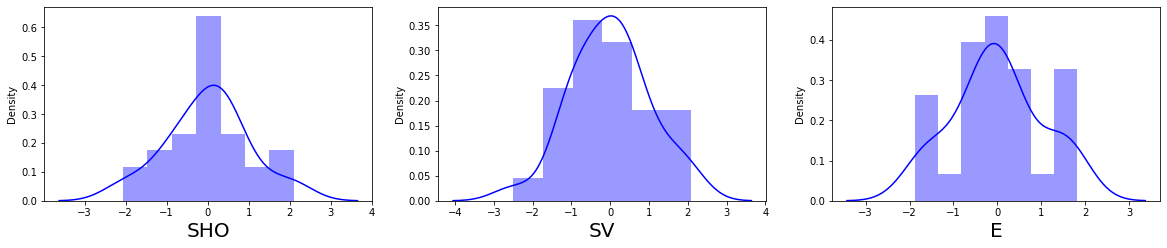

In [65]:
features_skewed = ['SHO','SV','E']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skewed_features]:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df_new[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> We can see that the data is normally distributed for all the columns.</b>

# Seperating dependent and independent variables

In [66]:
x = df_new.drop('W', axis=1)

y = df_new['W']

In [67]:
x.shape

(29, 14)

In [68]:
y.shape

(29,)

# Data Standardization using Standard Scaler

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

R        AB        2B        3B        HR        BB        SO  \
0   0.959398  0.830084  1.556538  1.010845 -0.765863 -1.536359 -2.727623   
1   0.331147 -0.702831  0.201171  1.208917 -0.181389 -0.495021  0.121896   
2  -0.274666 -1.100253  1.733325 -0.276617 -0.697101  1.252941 -0.925866   
3  -1.329231  0.233951 -0.800621 -0.474688 -0.869006 -1.145857 -0.201246   
4   0.174084  1.255894  0.908319  1.704094 -0.353293 -0.197495  0.072935   
5   1.856900  0.716535 -0.093474 -1.266972  1.743939  1.643442 -0.240414   
6   0.712585 -0.447345 -1.625627 -1.167936  1.915843 -0.885522  0.777970   
7  -0.835605 -0.447345  0.260100  0.020490  0.196801 -0.550807  0.572335   
8   1.497899  1.752672  1.202964  0.119526 -0.009484  0.230197 -1.013995   
9   1.565212 -0.078310  0.319029  0.020490  0.368705  0.695081 -0.181661   
10  1.071586 -0.816380  0.260100 -0.573723  2.362794  0.378960  1.375292   
11 -0.454167 -1.412514 -1.802414 -1.068901  0.506228 -0.569402 -0.994411   
12 -0.566355  0.390081 -0.682763 -0.969865  1.262607  0.230197  0.826931   
13  0.286272  1.184926  0.201171  1.406988 -0.525197  0.174411 -1.297968   
14 -0.768292 -0.461539  0.849390  0.713739 -0.834625  0.750867  0.151272   
15  0.353585  1.624929  1.085106 -0.474688 -0.731482 -0.085923  0.689841   
16  0.174084 -0.362183 -0.093474 -0.177581  0.334324  1.885182  2.609104   
17 -0.588792 -0.518313  0.024384  0.218561 -0.559578 -0.997094  0.464621   
18 -0.925355  0.773310 -0.977408 -0.474688  0.196801  0.564913  0.033766   
19  0.039459  0.148789  1.261893 -1.465043  0.540609  0.416151  0.376492   
20  0.488210 -1.256383 -0.505976 -1.861185  0.540609  1.364512  0.905268   
21 -1.531169 -0.759605 -2.214917  0.812774 -1.419099 -1.685122 -0.994411   
22 -2.428670 -1.369933 -1.330982 -1.366007 -2.106716  0.100030 -1.415474   
23 -1.239481  0.177176 -0.093474  0.515668 -1.075291 -1.461978  0.219817   
24 -0.319542 -1.866711 -0.623834 -0.573723  0.884418  1.810800  0.063143   
25  0.331147  0.688148  0.849390  0.713739 -0.869006 -0.160305 -0.906281   
26  0.869648  1.880415  0.908319  1.605059 -0.250150  0.453341  0.591919   
27 -0.700980 -0.844767 -0.800621  0.416632 -0.456435 -0.736760  0.738802   
28  1.251086  0.787503  0.024384  1.704094  0.850037 -1.443382  0.307947   

          SB        RA        ER       ERA       SHO        SV         E  
0   0.905953 -0.664514 -0.511148 -0.511388 -0.787002  1.532753 -0.348265  
1  -0.585315  0.154638  0.232161  0.238952  0.236737  0.312020 -0.540820  
2   0.116458 -0.678397 -0.754153 -0.643801 -0.252844 -0.664137 -1.326125  
3  -0.673037  0.168522  0.089217  0.040333 -0.513555 -0.820689  0.650818  
4  -0.015124  1.584683  1.561540  1.496876  0.236737 -1.149165 -0.540820  
5  -0.892341  0.126870  0.217866  0.150677 -2.064039  0.677176  0.082858  
6  -1.725697  0.057451  0.132100  0.194815 -0.252844  0.052325 -1.588197  
7   0.160319 -0.650630 -0.468265 -0.489319  0.236737  1.908137  0.237592  
8  -0.541454  0.890486  0.818231  0.768604 -0.252844 -0.365006  0.383386  
9   0.774370  0.612808  0.618110  0.614123 -0.513555  0.312020  1.554265  
10  1.651587 -0.983844 -0.925686 -0.864490  0.468029 -0.512328 -0.641926  
11 -1.374810 -0.192460 -0.096610 -0.047943  0.236737  0.436838  0.082858  
12 -0.629176  0.515620  0.575226  0.437572  0.236737  0.312020  0.161388  
13 -0.234429  0.557272  0.389399  0.393434  0.908147 -2.498840  1.810553  
14 -0.629176 -2.275049 -2.269360 -2.254827  0.908147  2.084917  0.311562  
15  0.642788 -1.289290 -1.497462 -1.658968  0.468029  1.333006  1.669209  
16  0.511205 -1.122683 -1.297340 -1.327935  2.090856  0.677176  1.203715  
17  0.028736  0.668344  0.646698  0.702398 -1.075340 -0.365006  1.430810  
18  2.221778  0.904370  0.903998  0.812742 -0.787002 -1.149165 -0.167685  
19 -1.418671 -1.053264 -1.140102 -1.173453  0.691583  0.906024 -0.348265  
20 -1.155506 -0.747817 -0.854214 -0.754146  0.468029 -0.221934 -0.167685  
21  1.256840 -0.150808  0.017745  0.128608  0.236737 -1.149165 -1.588197  
22 -0

<b> The data has been scaled now.</b>

# Checking VIF values to solve multicollinearity

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values Features
0      6.219825        R
1      9.828077       AB
2      2.683572       2B
3      3.196853       3B
4      7.369072       HR
5      2.686472       BB
6      2.741072       SO
7      1.757901       SB
8    179.096825       RA
9   1754.643859       ER
10  1310.260128      ERA
11     3.086344      SHO
12     4.021573       SV
13     1.742105        E

<b> The columns 'AB', 'RA', 'ER' and 'ERA' have vif greater than 10. Let's drop the column with highest vif score, i.e, the column 'ER'</b>

In [71]:
x.drop('ER', axis=1, inplace=True)

In [72]:
# Now, let's check the VIF again, after removing the column 'ER'

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values Features
0     4.352902        R
1     3.177214       AB
2     2.597985       2B
3     3.072775       3B
4     4.949255       HR
5     2.561982       BB
6     2.661842       SO
7     1.680467       SB
8   119.939744       RA
9   111.859162      ERA
10    2.932319      SHO
11    2.112465       SV
12    1.742101        E

<b> Now, again let's drop the column with highest vif, i.e., the column 'RA'</b>

In [73]:
x.drop('RA', axis=1, inplace=True)

In [74]:
# Now, let's check the VIF again, after removing the column 'RA'

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values Features
0     4.250076        R
1     2.238746       AB
2     2.597917       2B
3     3.030073       3B
4     4.562014       HR
5     2.222720       BB
6     2.042786       SO
7     1.568151       SB
8     3.878177      ERA
9     2.651314      SHO
10    1.954370       SV
11    1.493128        E

<b> As we can see, the vif value of all the columns is less than 10. Hence, we can conclude that the multicollinearity problem has been solved.</b>

# Finding best random state

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
from sklearn.linear_model import LinearRegression

maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc,"at random state ",maxRS)

Maximum r2 score is  0.9291790579976077 at random state  50


<b> Maximum r2 score is 92.13% at random state 50</b>

# Train Test Split

In [78]:
# Now, let's split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=50)

# Linear Regression

In [79]:
from sklearn import metrics

LR = LinearRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("R2_score:", r2_score(y_test,predLR))
print("MAE:", metrics.mean_absolute_error(y_test,predLR))
print("MSE:", metrics.mean_squared_error(y_test,predLR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,predLR)))

R2_score: 0.9291790579976077
MAE: 2.4627865987898443
MSE: 10.163242343651952
RMSE: 3.187984056367276


<b> The R2_score of Linear Regression model is 92.91%.</b>

# Ridge Regressor

In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

paramsRidge = {'alpha':[0.01, 0.1, 1.0, 10.26], 'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge, paramsRidge)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10.26, 'solver': 'saga'}


In [81]:
ridge = Ridge(alpha=10.26, solver='saga')
ridge.fit(x_train, y_train)
ridge.score(x_train, y_train)
pred_ridge = ridge.predict(x_test)

print("R2_score:", r2_score(y_test, pred_ridge))
print("MAE:", metrics.mean_absolute_error(y_test, pred_ridge))
print("MSE:", metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_score: 0.822598583878198
MAE: 4.386691460439945
MSE: 25.458198283948477
RMSE: 5.045611784902647


<b> The R2_score of Ridge Regressor is 82.25%.</b>

# Lasso Regressor

In [82]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

paramsLasso = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso, paramsLasso)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [83]:
lasso = Lasso(alpha=1, random_state=0)
lasso.fit(x_train, y_train)
lasso.score(x_train, y_train)
pred_lasso = lasso.predict(x_test)

print("R2_score:", r2_score(y_test, pred_lasso))
print("MAE:", metrics.mean_absolute_error(y_test, pred_lasso))
print("MSE:", metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_score: 0.8642951302468397
MAE: 3.8253497504300973
MSE: 19.4744864939597
RMSE: 4.41299065192299


<b> The R2_score of Lasso Regressor is 86.42%.</b>

# KNeighbors Regressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
knr.score(x_train, y_train)
pred_knr = knr.predict(x_test)

print("R2_score:", r2_score(y_test, pred_knr))
print("MAE:", metrics.mean_absolute_error(y_test, pred_knr))
print("MSE:", metrics.mean_squared_error(y_test, pred_knr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_knr)))

R2_score: 0.6201479697178254
MAE: 6.377777777777776
MSE: 54.51111111111109
RMSE: 7.3831640311665225


<b> The R2_score of KNeighbors Regressor is 62%.</b>

# Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)

print('R2_Score:',r2_score(y_test, pred_rfr))
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

R2_Score: 0.6203907002752924
MAE: 6.374444444444445
MSE: 54.47627777777778
RMSE: 7.38080468362209


<b> The R2_score of Random Forest Regressor is 62%.</b>

# Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)

print('R2_Score:',metrics.r2_score(y_test,pred_gbr))
print('MAE:',metrics.mean_absolute_error(y_test, pred_gbr))
print('MSE:',metrics.mean_squared_error(y_test, pred_gbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_gbr)))

R2_Score: 0.4330341112533659
MAE: 7.198026265433579
MSE: 81.3631048245787
RMSE: 9.020149933597484


<b> The R2_score of Gradient Boosting Regressor is 43%.</b>

# Stochastic Gradient Descent Regressor

In [87]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(x_train,y_train)
pred_sgdr = sgdr.predict(x_test)

print("R2_score:", r2_score(y_test, pred_sgdr))
print("MAE:", metrics.mean_absolute_error(y_test, pred_sgdr))
print("MSE:", metrics.mean_squared_error(y_test, pred_sgdr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_sgdr)))

R2_score: 0.9295665724719566
MAE: 2.753210821954454
MSE: 10.107631624518225
RMSE: 3.1792501670233855


<b>The R2_score of Stochastic Gradient Descent Regressor is 92.95%.</b>

# Checking for Cross Validation Score

In [88]:
from sklearn.model_selection import cross_val_score


print("CV score for LinearRegression:", cross_val_score(LR,x,y,cv=5).mean())
print("CV score for Ridge Regression:", cross_val_score(ridge,x,y,cv=5).mean())
print("CV score for Lasso Regression:",cross_val_score(lasso,x,y,cv=5).mean())
print("CV score for KNeighbors Regression:",cross_val_score(knr,x,y,cv=5).mean())
print("CV score for Random Froest Regression:",cross_val_score(rfr,x,y,cv=5).mean())
print("CV score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5).mean())
print("CV score for Stochastic Gradient Boosting Regression:",cross_val_score(sgdr,x,y,cv=5).mean())

CV score for LinearRegression: 0.37344412304899344
CV score for Ridge Regression: 0.34806911527277434
CV score for Lasso Regression: 0.5206537019436117
CV score for KNeighbors Regression: 0.013785729869268005
CV score for Random Froest Regression: -0.5302851103928177
CV score for Gradient Boosting Regression: -1.2216899262901193
CV score for Stochastic Gradient Boosting Regression: 0.2703787312639735


<b> From the difference of both R2_score and cross validation score, we can conclude that Lasso best fits the model.</b>

# Hyperparameter Tuning

In [89]:
# Now, let's perform the Hyperparameter Tuning for Lasso Regressor

from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.01,0.1,1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

GCV = GridSearchCV(Lasso(),parameters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [90]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 8,
 'selection': 'random',
 'tol': 1000}

In [91]:
# Creating the Final Model

Baseball = Lasso(alpha=1.0, fit_intercept='bool', max_iter=8, selection='random', tol=1000)
Baseball.fit(x_train,y_train)
pred = Baseball.predict(x_test)
print('R2_score:',r2_score(y_test, pred_lasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_score: 86.42951302468397
RMSE value: 4.41299065192299


<b> After Hyperparameter Tuning, the R2_score is 86.42%</b>

# Saving the Model

In [92]:
import joblib
joblib.dump(Baseball, 'Baseball_Case_Study.pkl')

['Baseball_Case_Study.pkl']

In [93]:
loadmodel = joblib.load('Baseball_Case_Study.pkl')

# Prediction

In [94]:
import numpy as np

a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))

df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

Original  Predicted
0        68  67.586022
1        78  79.607706
2        74  75.459429
3        88  83.100817
4        68  74.258073
5        64  73.152275
6        92  91.269537
7        90  92.763143
8       100  99.118936

# Prediction with Visualization

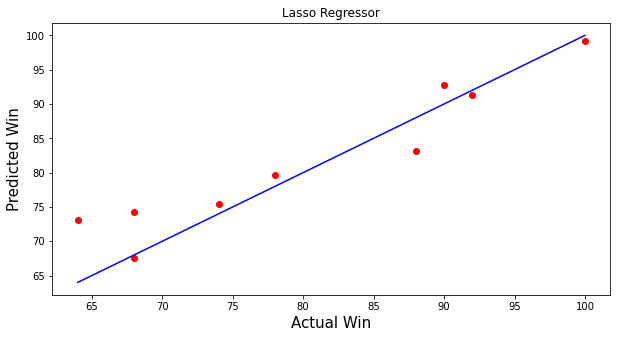

In [95]:
# Now, let's plot the graph of Actual win vs Predicted win

plt.figure(figsize=(10,5))
plt.scatter(y_test, predicted, c='r')
plt1 = max(max(predicted), max(y_test))
plt2 = min(min(predicted), min(y_test))
plt.plot([plt1,plt2], [plt1,plt2], 'b-')
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.title("Lasso Regressor")
plt.show()

<b> In the graph above, the blue line represents the Actual win and red dots represent the Predicted win.</b>

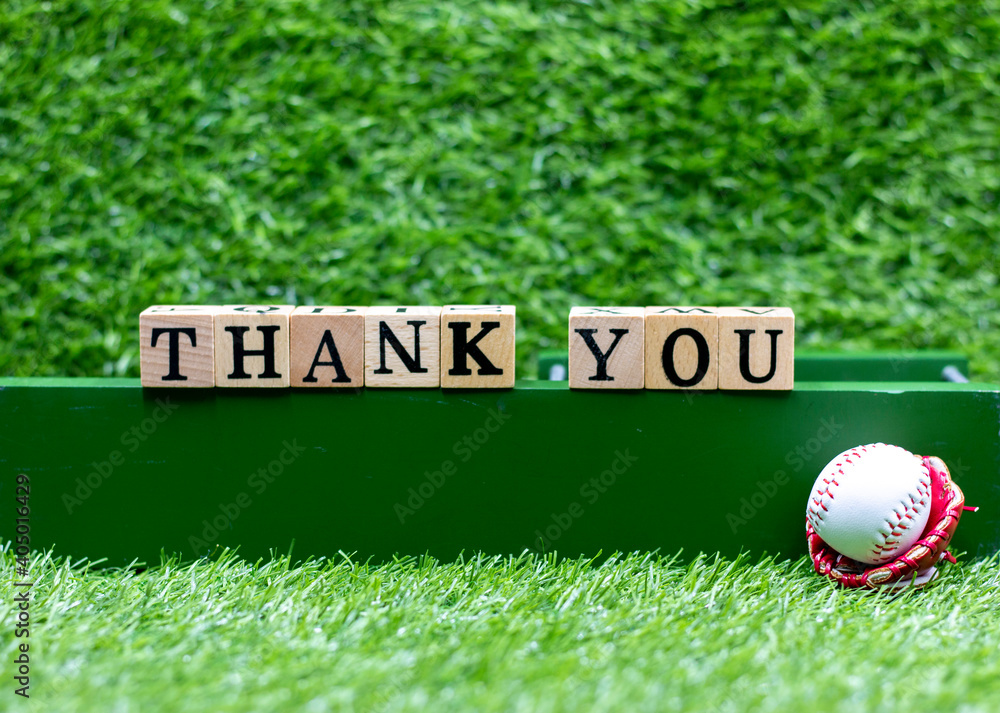